## Importing Modules

In [1]:
pip install ultralytics --upgrade

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 898.7/898.7 kB 14.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [2]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import os

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


## Preparing dataset

In [3]:
test_folder_path = '/kaggle/input/cars-image-dataset/Cars Dataset/test'
all_folders = os.listdir(test_folder_path)

In [4]:
# listing all car path in a dictionary
cars_dictionary = {}

for car_name in all_folders:
    car_folder_path = test_folder_path + f'/{car_name}'
    cars_list = os.listdir(car_folder_path)
    cars_path_list = [test_folder_path + f'/{car_name}' +f'/{car}' for car in cars_list]
    cars_dictionary[car_name] = cars_path_list

In [5]:
# creating a sample list
sample_car_path = [cars_dictionary[car][0] for car in cars_dictionary]
sample_car_path

['/kaggle/input/cars-image-dataset/Cars Dataset/test/Hyundai Creta/208.jpg',
 '/kaggle/input/cars-image-dataset/Cars Dataset/test/Tata Safari/369.jpg',
 '/kaggle/input/cars-image-dataset/Cars Dataset/test/Swift/764.jpg',
 '/kaggle/input/cars-image-dataset/Cars Dataset/test/Mahindra Scorpio/56.jpg',
 '/kaggle/input/cars-image-dataset/Cars Dataset/test/Toyota Innova/764.jpg',
 '/kaggle/input/cars-image-dataset/Cars Dataset/test/Rolls Royce/212.jpg',
 '/kaggle/input/cars-image-dataset/Cars Dataset/test/Audi/109.jpg']

## Preparing model

In [6]:
model = YOLO("yolov8l.pt")

100%|██████████| 83.7M/83.7M [00:01<00:00, 65.5MB/s]


## Detection

In [7]:
results = model.track(sample_car_path, conf = 0.5, save=True)

requirements: Ultralytics requirement ['lap>=0.5.12'] not found, attempting AutoUpdate...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 25.5 MB/s eta 0:00:00

requirements: AutoUpdate success ✅ 9.8s, installed 1 package: ['lap>=0.5.12']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect


0: 640x640 1 car, 2071.7ms
1: 640x640 1 car, 2071.7ms
2: 640x640 1 car, 2071.7ms
3: 640x640 1 truck, 2071.7ms
4: 640x640 1 car, 2071.7ms
5: 640x640 1 car, 2071.7ms
6: 640x640 1 car, 2071.7ms
Speed: 7.9ms preprocess, 2071.7ms inference, 3.8ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/track


## Displaying some outputs

In [8]:
# reading images as arrays
car_1 = mpimg.imread(sample_car_path[0])
car_1_processed = mpimg.imread('/kaggle/working/runs/detect/track/208.jpg')
car_2 = mpimg.imread(sample_car_path[1])
car_2_processed = mpimg.imread('/kaggle/working/runs/detect/track/369.jpg')

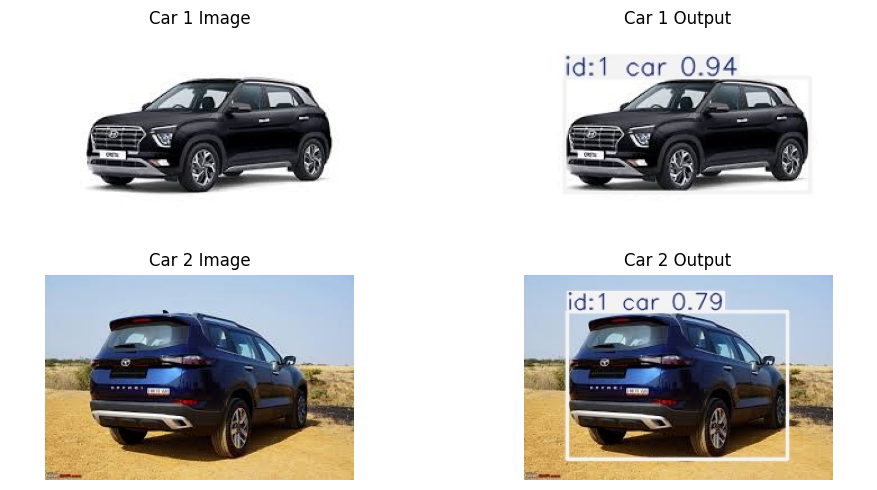

In [9]:
fig, axes = plt.subplots(2, 2, figsize=(10, 5))

axes[0, 0].imshow(car_1)
axes[0, 0].axis('off')  
axes[0, 0].set_title('Car 1 Image') 

axes[0, 1].imshow(car_1_processed)
axes[0, 1].axis('off')
axes[0, 1].set_title('Car 1 Output')

axes[1, 0].imshow(car_2)
axes[1, 0].axis('off')
axes[1, 0].set_title('Car 2 Image')

axes[1, 1].imshow(car_2_processed)
axes[1, 1].axis('off')
axes[1, 1].set_title('Car 2 Output')

plt.tight_layout()
plt.show()
